# Importing the libraries

In [6]:
!pip install scikit-learn

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import seaborn as sns

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing the dataset

`To display the dataset: print(dataset.to_string())`


In [66]:
dataset = pd.read_csv("/content/drive/MyDrive/CS 301 - Fall/Heart Attack.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [67]:
print("Dataset length = ", len(dataset))
print ("Dataset shape = ", dataset.shape)

Dataset length =  1319
Dataset shape =  (1319, 9)


# Taking care of missing data


In [68]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :7])
X[:, :7] = imputer.transform(X[:, :7])

# Encoding the Dependent Variable

Class column will be encoded.

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["class"]=le.fit_transform(dataset["class"])

In [70]:
dataset.sample(10)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
513,42,1,94,98,46,123.0,1.300,0.006,0
804,70,0,74,119,78,64.0,2.090,0.099,1
1312,48,1,84,118,68,96.0,5.330,0.006,0
569,63,0,62,124,66,271.0,0.657,0.021,1
1002,50,1,60,150,83,125.0,2.670,0.003,0
1154,71,0,60,124,100,200.0,1.180,0.014,0
573,68,1,90,111,65,134.0,1.650,0.016,1
631,71,1,82,80,42,102.0,1.180,0.010,0
1051,66,0,87,115,78,103.0,3.780,0.074,1
897,23,1,82,138,82,89.0,1.460,0.005,0


In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


The code is preprocessed and all the values are encoded.

# Decision Tree Implementation

In [84]:
#seperating the dependent and independent variable
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

# splitting the dataset into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=100)

#function to perform training
train_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
train_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [85]:
# function to make predictions
Y_pred = train_entropy.predict(X_test)
print(Y_pred)


[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0
 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1
 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0
 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0
 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1]


In [86]:
# accuracy
print("Accuracy: ", accuracy_score(Y_test, Y_pred)*100)
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy:  98.73737373737373
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       158
           1       1.00      0.98      0.99       238

    accuracy                           0.99       396
   macro avg       0.99      0.99      0.99       396
weighted avg       0.99      0.99      0.99       396



# Confusion Matrix

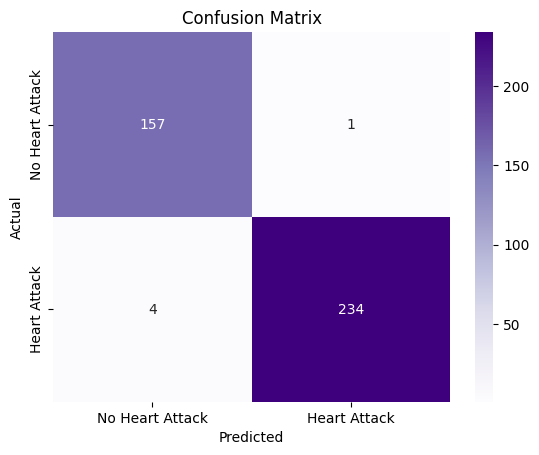

In [87]:
matrix_table = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix_table, annot=True, fmt='d', cmap='Purples', xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()